# Projet Satisfaction

## Exploration des données et Data Visualisation

Importation du fichier 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect
%matplotlib inline

df = pd.read_csv("c:/Users/Dan/python/reviews_trust.csv")

Affichage du Dataframe

In [36]:
df.head(10)

,Commentaire,star,date,client,reponse,source,company,ville,date_commande,ecart,Language,Commentaires_reduit,com_nb_mots,Commentaires_reduit_racine,Commentaires_reduit_4mots
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,2021-06-20 00:00:00+00:00,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,fr,"bonjour , ca doit 5 ans environ membre showroo...",246,"bonjour , ca doit 5 an environ membr showroopr...",bonjour doit environ membre showrooprive jamai...
1,Vente lacoste article manquant photo prise sur...,1,2021-06-20 00:00:00+00:00,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,fr,vente lacoste manquant photo prise 6 articles ...,20,vent lacost manqu photo pris 6 articl moiti li...,vente lacoste manquant photo prise articles mo...
2,"Vente Lacoste Honteuse , article erroné , arti...",1,2021-06-19 00:00:00+00:00,Vanessa L,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,fr,"vente lacoste honteuse , erroné , manquant , b...",219,"vent lacost honteux , erron , manqu , bon livr...",vente lacoste honteuse erroné manquant livrais...
3,J'ai commandé des mules de la marque Moosefiel...,2,2021-06-19 00:00:00+00:00,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom,NaN,NaN,NaN,fr,"commandé mules marque moosefield , très déçue ...",29,"command mul marqu moosefield , tres déçu produ...",commandé mules marque moosefield produit étiqu...
4,Commande téléphone etat A+ . Livraison d un vi...,1,2021-06-19 00:00:00+00:00,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom,NaN,NaN,NaN,fr,téléphone etat a+ . livraison vieux téléphone ...,52,téléphon etat a+ . livraison vieux téléphon po...,téléphone etat livraison vieux téléphone pourr...
5,"Commande passée pour une vente Lacoste , livra...",1,2021-06-19 00:00:00+00:00,Cyril CARABOT,"Bonjour Cyril , Je fais suite à votre message ...",TrustPilot,ShowRoom,NaN,NaN,NaN,fr,"passée vente lacoste , livraison 15 après date...",46,"pass vent lacost , livraison 15 apres dat prév...",passée vente lacoste livraison date prévue sem...
6,Annulation de commande après 2 mois d ’ attent...,1,2021-06-18 00:00:00+00:00,aurore regnier,"Bonjour Aurore , Je suis sincèrement désolé d'...",TrustPilot,ShowRoom,NaN,NaN,NaN,fr,annulation après 2 mois ’ attente geste sans e...,51,annul apres 2 mois ’ attent gest san expliqu ....,annulation mois attente geste sans explication...
7,Extrêmement déçue de la vente Apple ! ! Achat ...,1,2021-06-18 00:00:00+00:00,Paola Perez,"Bonjour Paola , Je fais suite à votre message ...",TrustPilot,ShowRoom,NaN,NaN,NaN,fr,extrêmement déçue vente apple ! ! achat ’ ipho...,85,extrêm déçu vent apple ! ! achat ’ iphon recon...,extr mement vente apple achat iphone reconditi...
8,Extrêmement deçu pour mes achats lors la vente...,1,2021-06-18 00:00:00+00:00,Ayna,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,fr,extrêmement deçu achats lors vente dolores pro...,20,"extrêm deçu achat lor vent dolor promes , reçu...",extr mement achats lors vente dolores promesas...
9,S'il y'avait une option : ne pas mettre d'étoi...,1,2021-06-18 00:00:00+00:00,linda Ng,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,fr,s'il y'avait option : mettre d'étoile ( étoile...,80,s'il y'av option : mettr d'étoil ( étoil trop ...,avait option mettre étoile étoile trop content...


## Nettoyage du dataset

On observe beaucoup de valeurs NaN dans l'aperçu précédent, évaluons leurs volumes pour chacune des colonnes du dataset.

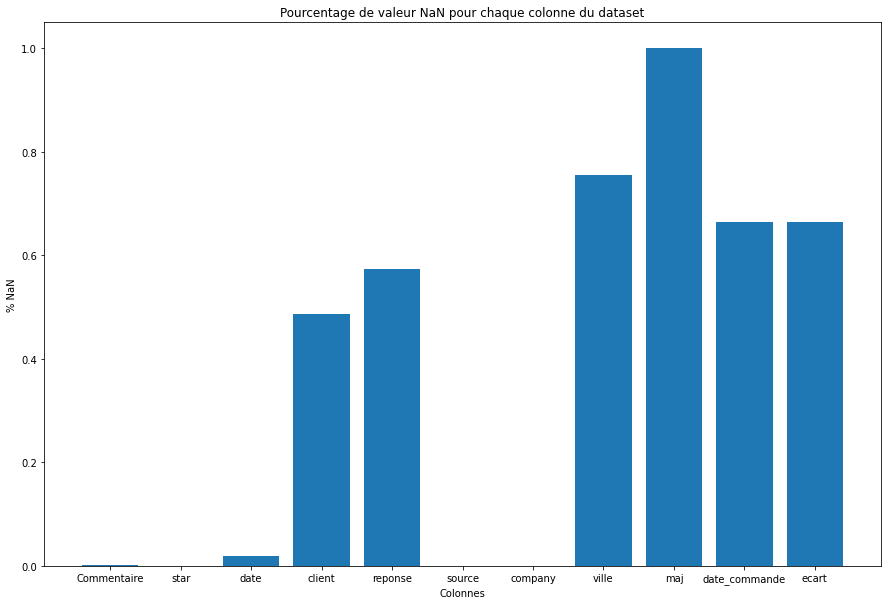

In [3]:
plt.figure(figsize= (15,10))
plt.bar(df.columns, df.isna().sum()/len(df))
plt.ylabel("% NaN")
plt.xlabel("Colonnes")
plt.title("Pourcentage de valeur NaN pour chaque colonne du dataset")
plt.show()

La colonne maj ne contient quasiment aucune valeur. Il n'est donc pas nécessaire de la conserver pour la suite du projet.

La colonne commentaire contient aussi quelques valeurs NaN, qu'il faut supprimer.

In [4]:
df =df.drop(['maj'], axis = 1)
df = df.dropna(axis = 0, how = "all", subset =["Commentaire"])

Au parcours des commentaires , on observe que plusieurs sont en langue étrangère. Identifions combiens de langage sont présent dans le dataset
Pour cela créons une colonne qui va déterminer le langage du commentaire en utilisant la méthode detect du module langdetect

In [5]:
df["Language"] = df.Commentaire.apply(lambda row : detect(str(row)))

Affichons à présent le nombre de commentaires en fonction de la langue utilisée

<AxesSubplot:xlabel='Language', ylabel='count'>

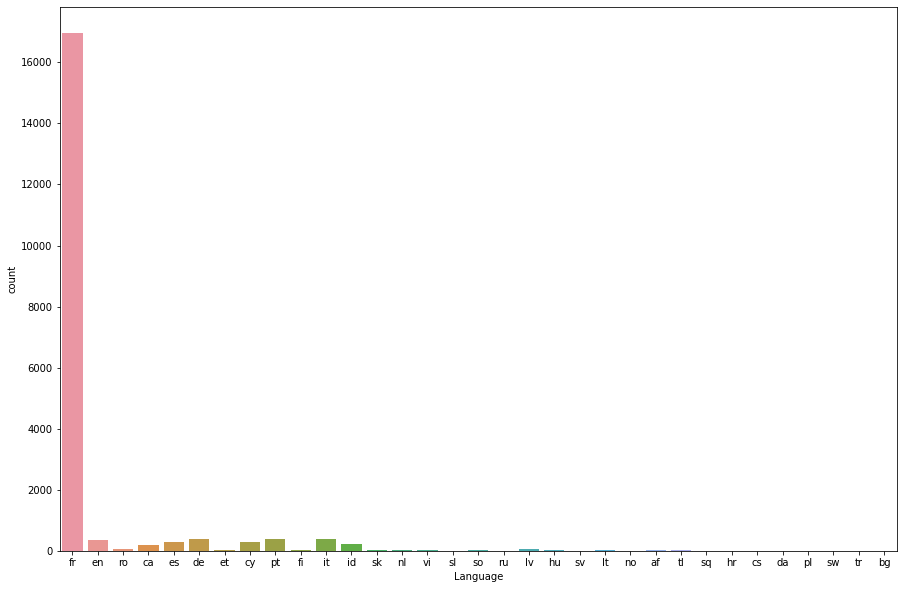

In [6]:
plt.figure(figsize= (15,10))
sns.countplot(x=df["Language"])

La grande majorité des commentaires sont en français. Cependant, la présence de commentaires en langue étrangère pourrait gêner l'apprentissage de notre algorithme. Il convient donc de supprimer les commentaires qui ne sont pas français

In [7]:
df = df.drop(df[df["Language"]!= "fr"].index, axis = 0)

Évaluons à présent le nombre de doublons que contient ce dataset

In [8]:
df.duplicated().sum()

320

Supprimons les lignes doublons pour terminer la 1ere étape de nettoyage avant l'analyse de données : 

In [9]:
df = df.drop_duplicates(keep = "first")

## Dans la suite de l'analyse, nous allons visualiser les Méta-Données en fonction du nombre d'étoile afin d'observer les relations pouvant exister

<AxesSubplot:xlabel='star', ylabel='count'>

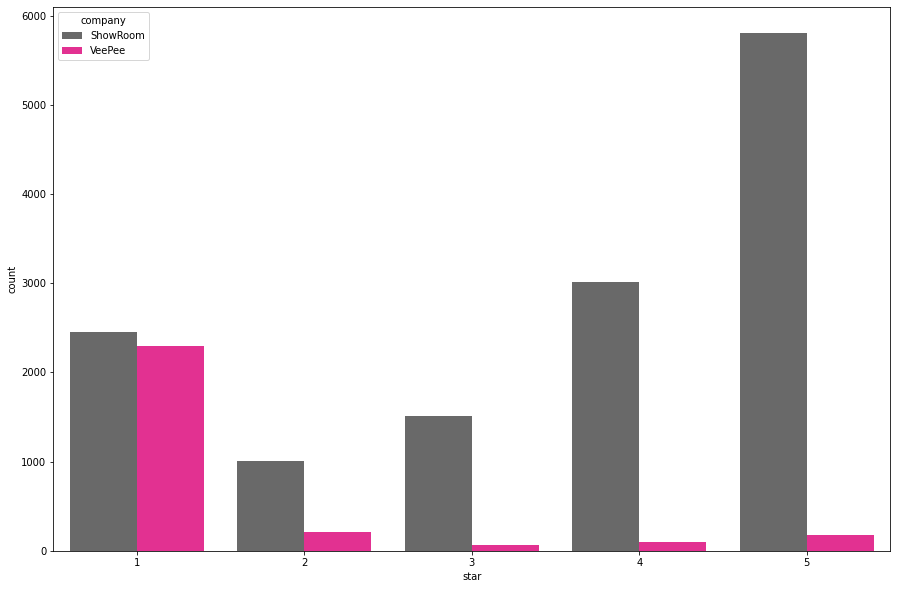

In [10]:
plt.figure(figsize= (15,10))
sns.countplot(x=df["star"], hue =df["company"], palette=["dimgray","deeppink"])

La majorité des notes reçues par VeePee sont défavorables. 
On remarque en revanche que pour Showroom, les notes sont plus réparties, avec une majorité de notes "positives"
Il n'est pas à exclure que le fait de laisser une note pour Showroom soit incentivé. Il serait intéressant d'évaluer la "taille" des commentaires en fonction des notes. 

<AxesSubplot:xlabel='star', ylabel='count'>

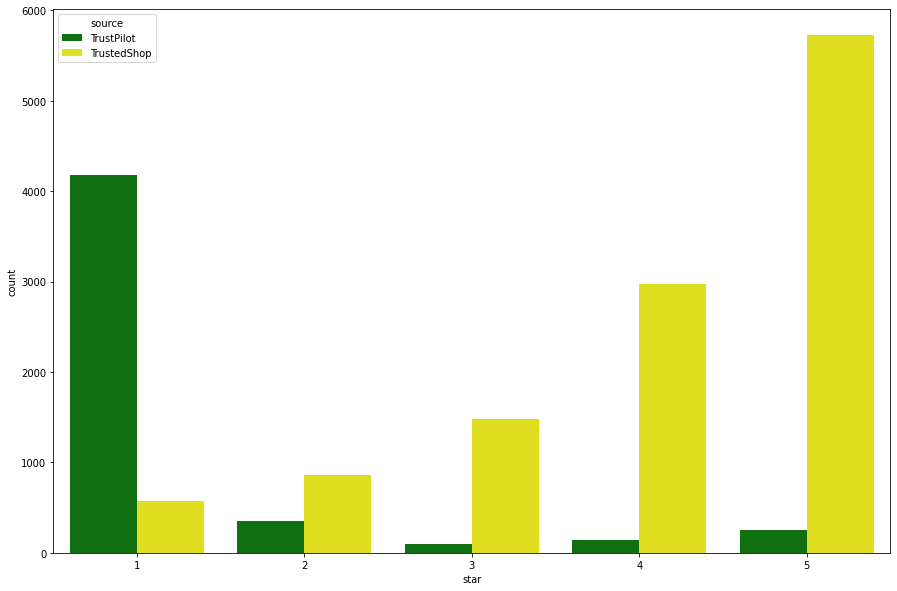

In [11]:
plt.figure(figsize= (15,10))
sns.countplot(x=df["star"], hue =df["source"], palette=["green","yellow"] )

La majorité des notes positives sont issues de TrustedShop. Il est étonnant de voir un aussi grand écart de notation entre 2 sources différentes.

<AxesSubplot:title={'center':'Note par entreprise depuis TrustedShop'}, xlabel='star', ylabel='count'>

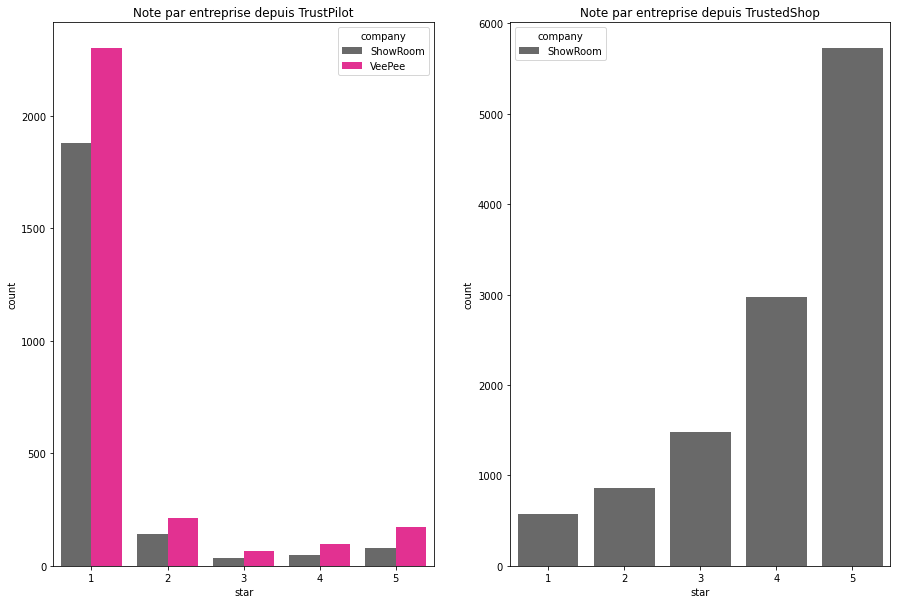

In [12]:
pilotcompany = df[df["source"] == "TrustPilot"]
shopcompany = df[df["source"] == "TrustedShop"]
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,10)
axes[0].set_title('Note par entreprise depuis TrustPilot')
sns.countplot(ax = axes[0], x=pilotcompany["star"], hue =pilotcompany["company"],palette=["dimgray","deeppink"])
axes[1].set_title('Note par entreprise depuis TrustedShop')
sns.countplot(ax = axes[1],x=shopcompany["star"], hue =shopcompany["company"],palette=["dimgray","deeppink"])

Au delà de voir que seul ShowRoom est sur TrustedShop, ce qui est le plus étonnant dans ces deux graphiques et le fait que sur une source, ShowRoom obtient à une grande majorité une note de 1, alors que sur TrustedShop, la majorité des avis sont entre 4 et 5

Ces observations renforcent l'hypothèse que les avis postés sur TrustedShop ont été incentivés. Il n'est pas non plus à exclure que les notes et avis puissent être "achetés".



Lorsque l'on observe la colonne réponses, chaque message commence systématiquement par "Bonjour , Je suis sincèrement navré d'apprendre que votre commande ..."
Cela laisse donc à penser que la présence d'une réponse fait suite à un commentaire ainsi qu'une note négative.
Vérifions cela concernant les notes: 


<AxesSubplot:xlabel='star', ylabel='count'>

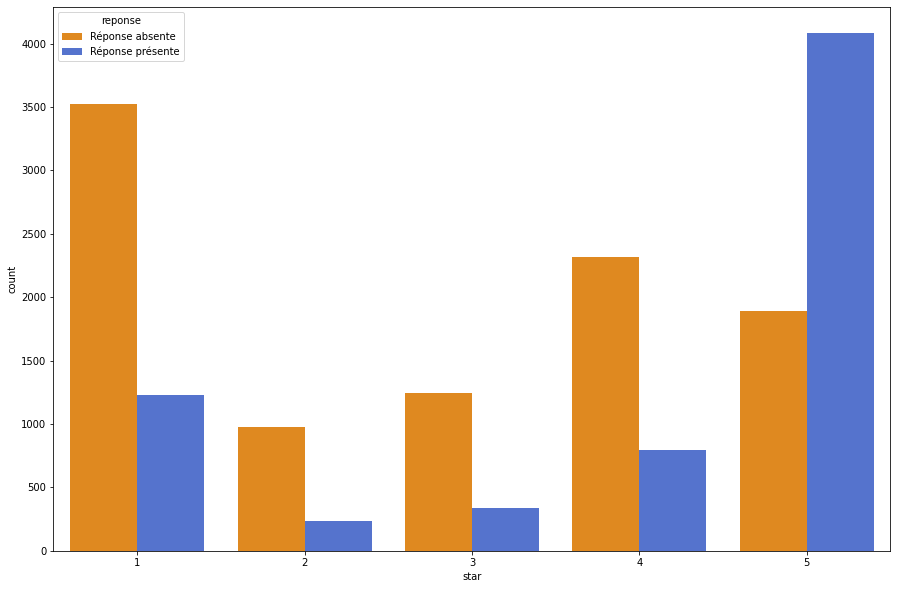

In [40]:
plt.figure(figsize= (15,10))
sns.countplot(x=df["star"], hue =df["reponse"].isna().replace(to_replace =[False,True], value=["Réponse présente","Réponse absente"]),palette=["darkorange","royalblue"])

On voit que notre intuition était fausse et que dans la majorité des cas, lorsqu'une réponse est présente dans la base de données, cela correspond à une bonne note.
Il se peut donc que la note ne corresponde pas toujours au sentiment du commentaire qui a été laissé, soit car elle a été éditée suite à l'intervention du service client, soit car le commentaire se concentre sur un des seul aspect positif / négatif tout en laissant une note correspondant à une appréciation global, mais qui n'est ici pas verbalisé

#### Observons à présent l'évolution des notations en fonction du temps.

In [14]:
df["date"]=pd.to_datetime(df['date'], utc=True)

<AxesSubplot:xlabel='date', ylabel='nombre_commentaire'>

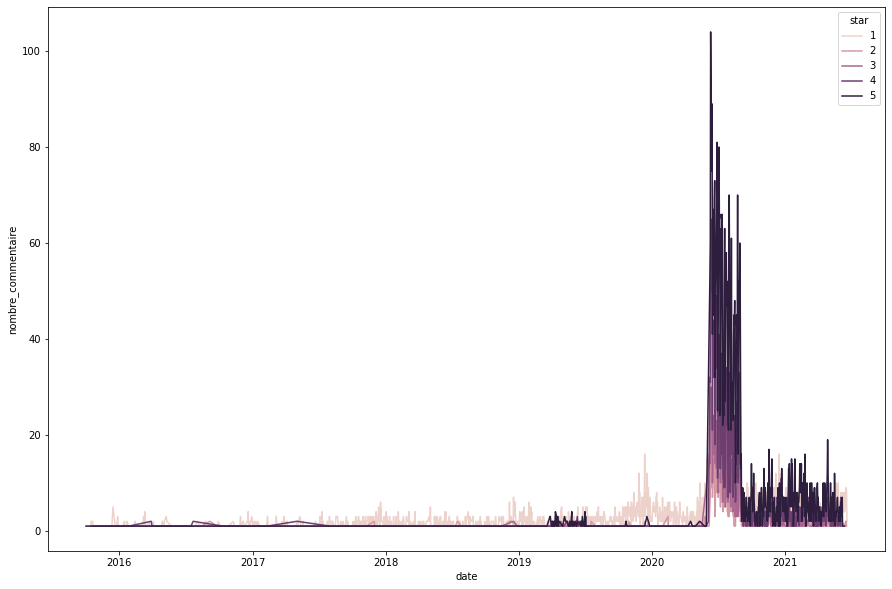

In [15]:
plt.figure(figsize= (15,10))
stardate = df.groupby("star").date.value_counts().reset_index(name ='nombre_commentaire')
sns.lineplot(x= "date", y = "nombre_commentaire", hue = "star",data=stardate)

On observe que la majorité des commentaires entre 2016 à mi 2020 correspondent à une note de 1.
A partir de 2021, on observe une inversion des tendances, avec en majorité des notes de 3 à 5

Regardons si cette nouvelle tendance est spécifique à une entreprise.


<AxesSubplot:xlabel='date', ylabel='nombre_commentaire'>

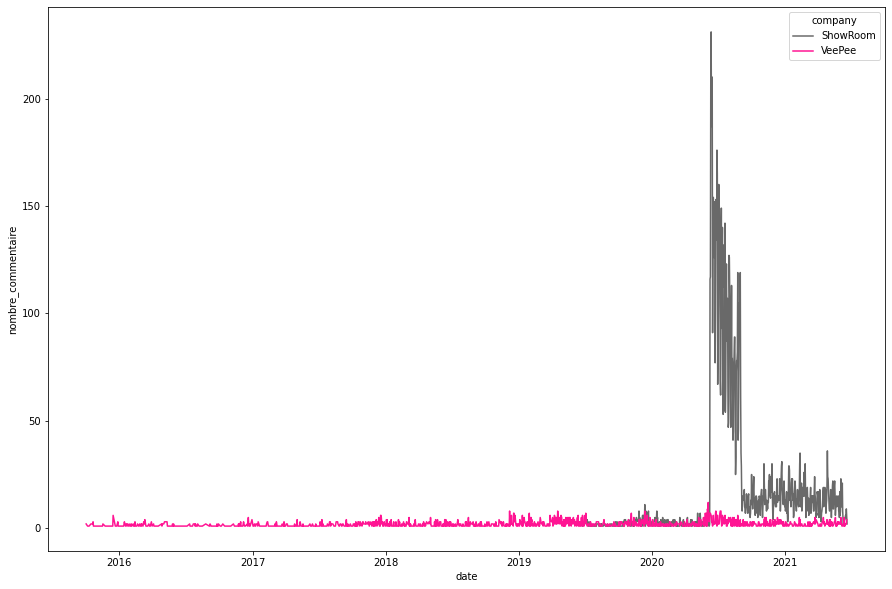

In [16]:
plt.figure(figsize= (15,10))
compdate = df.groupby("company").date.value_counts().reset_index(name ='nombre_commentaire')
sns.lineplot(x= "date", y = "nombre_commentaire", hue = "company",data=compdate,palette=["dimgray","deeppink"])

Un pic de commentaires reçu pour ShowRoom apparaît mi-2020.
Cela peut être due à une opération marketing ou bien cela peut se corroborer avec l'hypothèse évoquée plus haut que les commentaires de ShowRooms sont devenus incentivés à partir de cette date.

Une autre explication pourrait être au niveau de la source du commentaire. Observons cela:


<AxesSubplot:xlabel='date', ylabel='nombre_commentaire'>

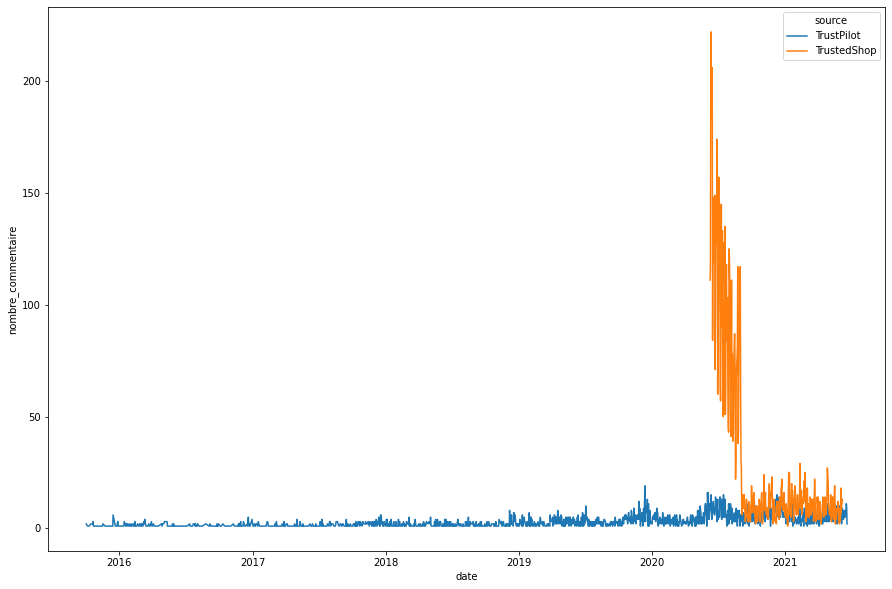

In [17]:
plt.figure(figsize= (15,10))
compdate = df.groupby("source").date.value_counts().reset_index(name ='nombre_commentaire')
sns.lineplot(x= "date", y = "nombre_commentaire", hue = "source",data=compdate,)

En voyant ce graphique, il devient clair que l'arrivée massive de commentaires ainsi que de bonnes notes est lié à l'arrivée de la source TrustedShop à partir de mi-2020.

#### Voyons à présent si la présence d'un nom client peut se lier avec le nombre d'étoile de l'avis posté:

<AxesSubplot:xlabel='star', ylabel='count'>

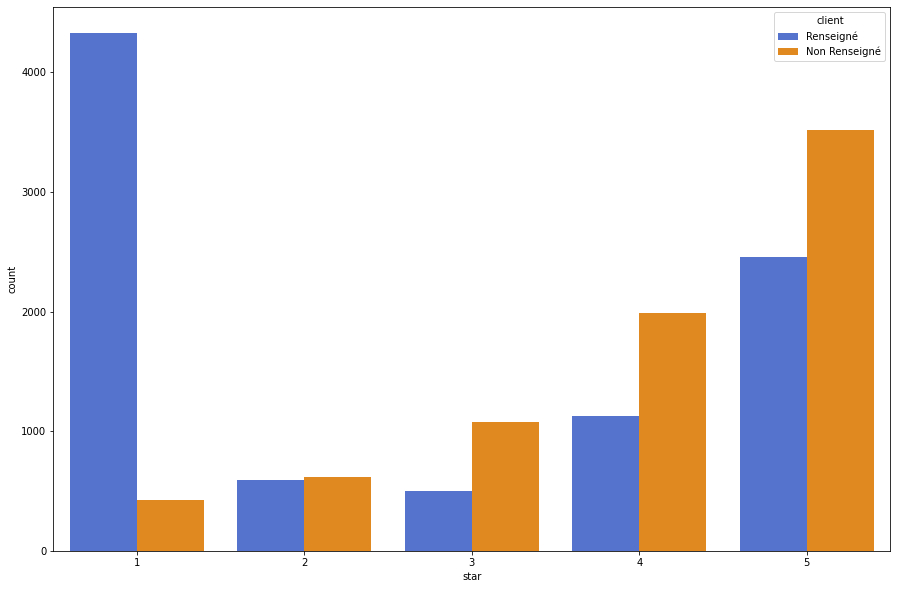

In [42]:
plt.figure(figsize= (15,10))
sns.countplot(x=df["star"], hue =df["client"].isna().replace(to_replace =[False,True], value=["Renseigné","Non Renseigné"]),palette=["royalblue","darkorange"])

Un nombre important d'avis, ou l'identité du client est connu, ont une note de 1. On ne peut cependant pas conclure que la présence du nom de client soit synonyme d'un avis négatif, au vu de la répartition du reste des notes lorsque le nom client est renseigné

Observons cependant la répartition de cette donnée en fonction des entreprises présentent dans le dataset:

<AxesSubplot:xlabel='company', ylabel='count'>

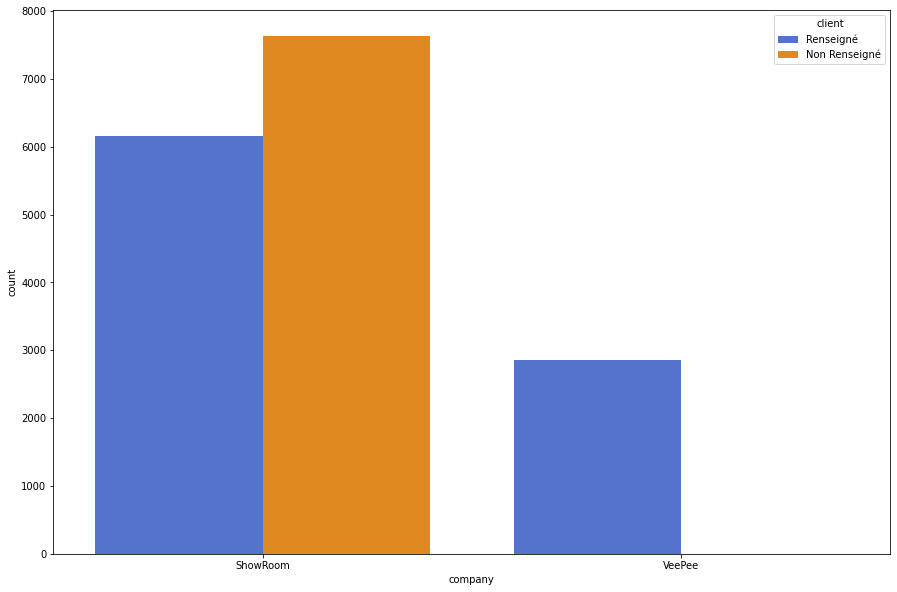

In [43]:
plt.figure(figsize= (15,10))
sns.countplot(x=df["company"], hue =df["client"].isna().replace(to_replace =[False,True], value=["Renseigné","Non Renseigné"]),palette=["royalblue","darkorange"])

On remarque que l'intégralité des avis ou le nom du client n'est pas communiqué est lié à l'entreprise ShowRoom. Si l'on fait le lien avec le graphique précédent, une majorité des bonnes notations pour cette entreprise sont donc issues d'avis sans nom client.

Regardons si cela est plutôt lié au site (source) ou a été posté l'avis:

<AxesSubplot:xlabel='source', ylabel='count'>

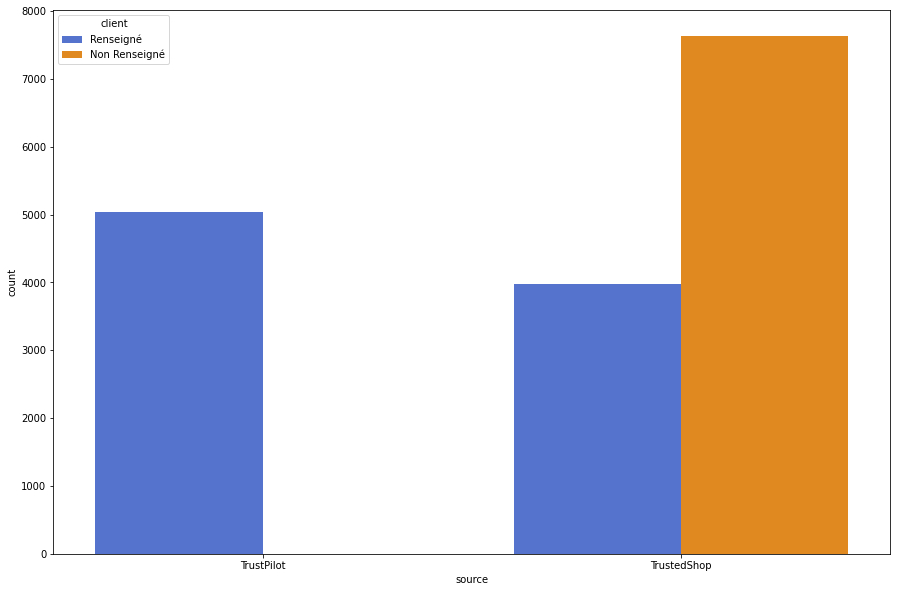

In [44]:
plt.figure(figsize= (15,10))
sns.countplot(x=df["source"], hue =df["client"].isna().replace(to_replace =[False,True], value=["Renseigné","Non Renseigné"]),palette=["royalblue","darkorange"])

Poster un commentaire sur TrustedShop semble ne pas nécessiter de renseigner obligatoirement un nom client. Il semble donc plus aisé de poster un avis sur TrustedShop. Cette facilité soutient l'hypothèse évoquée plus haut d'avis incentive ou achetée par ShowRoom sur TrustedShop.

#### Faisons la même observation pour la localisation (ville) du client:


<AxesSubplot:xlabel='source', ylabel='count'>

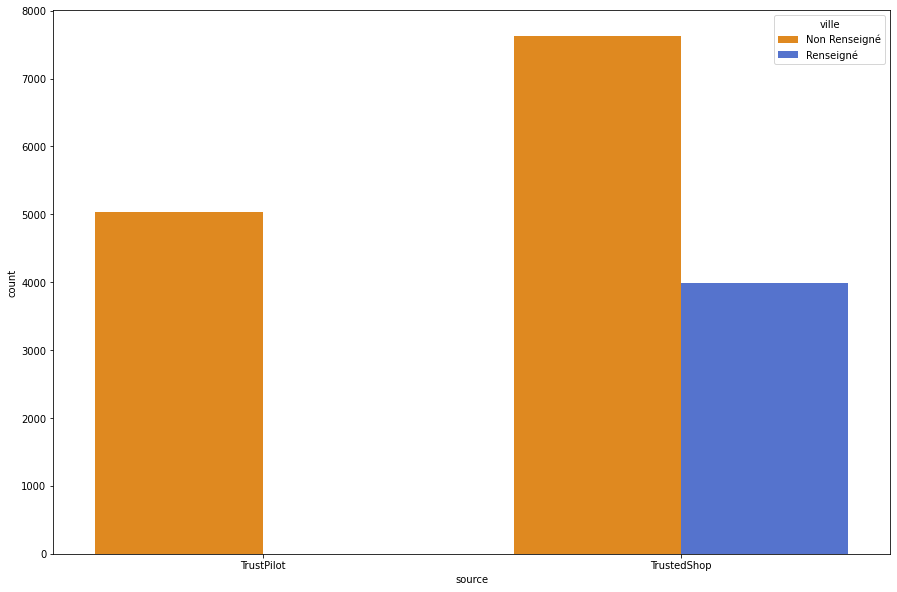

In [45]:
plt.figure(figsize= (15,10))
sns.countplot(x=df["source"], hue =df["ville"].isna().replace(to_replace =[False,True], value=["Renseigné","Non Renseigné"]),palette=["darkorange","royalblue"])

Là encore, poster un commentaire sur TrustedShop semble ne pas nécessiter de renseigner obligatoirement une ville.

## Passons à présent à l'analyse des Verbatims


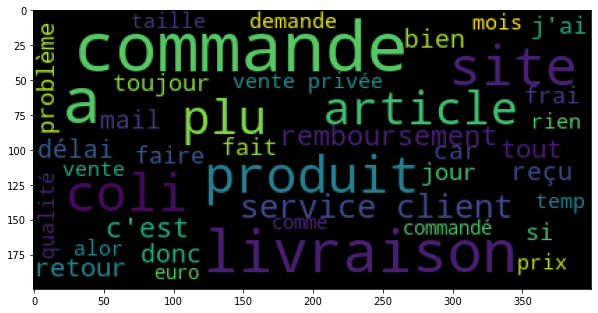

In [22]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
stop_words = set(stopwords.words('french'))

text = ""
for comment in df.Commentaire:
    text += comment

wc = WordCloud(background_color = "black", max_words=40,stopwords= stop_words,max_font_size=50, random_state=42)

plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(text)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()



Sur ce premier nuage des mots, on observe la présence de nombreux mots parasites. Il est bon de les inclure dans la fonction stop words afin que le nuage de mots se concentre sur les points importants remontés.

In [23]:
stop_words.update(["toujour", "commande","article","euro","faire","donc","car"," si ","c'est","comme"," alor "," fait "])

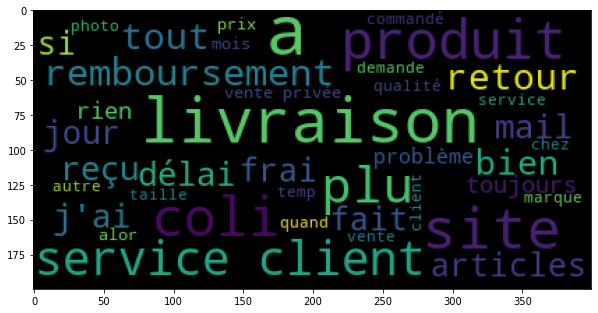

In [24]:
wc = WordCloud(background_color = "black", max_words=40,stopwords= stop_words,max_font_size=50, random_state=42)

plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(text)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

Itérons la démarche précédente pour affiner le contenu de notre nuage de mot

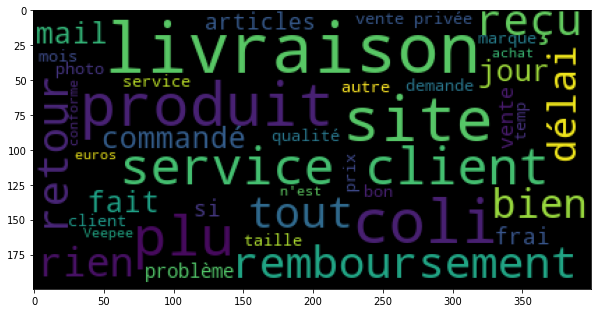

In [25]:
stop_words.update(["j'ai","ça","chez","quand", "a","toujours","alors"])
wc = WordCloud(background_color = "black", max_words=40,stopwords= stop_words,max_font_size=50, random_state=42)

plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(text)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

Cette première approche nous permet déjà de voir quelques thèmes liés à la chaîne logistique remonter des commentaires: 

    - Le service client
    
    - la livraison (et les délais)
    
    - les retours & remboursement

Appliquons à présent notre filtre stop_words à chaque commentaire du dataset

In [26]:
def stop_words_filtering(my_comment):
    new_comment =""
    for word in my_comment.lower().split(" "):
        if word not in stop_words:
            new_comment += word
            new_comment += " "
    return new_comment

df["Commentaires_reduit"] = df.Commentaire.apply(lambda row : stop_words_filtering(row))
df.head()

,Commentaire,star,date,client,reponse,source,company,ville,date_commande,ecart,Language,Commentaires_reduit
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,2021-06-20 00:00:00+00:00,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,fr,"bonjour , ca doit 5 ans environ membre showroo..."
1,Vente lacoste article manquant photo prise sur...,1,2021-06-20 00:00:00+00:00,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,fr,vente lacoste manquant photo prise 6 articles ...
2,"Vente Lacoste Honteuse , article erroné , arti...",1,2021-06-19 00:00:00+00:00,Vanessa L,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,fr,"vente lacoste honteuse , erroné , manquant , b..."
3,J'ai commandé des mules de la marque Moosefiel...,2,2021-06-19 00:00:00+00:00,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom,NaN,NaN,NaN,fr,"commandé mules marque moosefield , très déçue ..."
4,Commande téléphone etat A+ . Livraison d un vi...,1,2021-06-19 00:00:00+00:00,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom,NaN,NaN,NaN,fr,téléphone etat a+ . livraison vieux téléphone ...




#### Analysons à présent la taille des commentaires nettoyés des mots vides en fonction de la note laissée.

In [27]:
df["com_nb_mots"] = df.Commentaire.apply(lambda row : len(row.split(" ")))
df.head()

,Commentaire,star,date,client,reponse,source,company,ville,date_commande,ecart,Language,Commentaires_reduit,com_nb_mots
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,2021-06-20 00:00:00+00:00,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,fr,"bonjour , ca doit 5 ans environ membre showroo...",246
1,Vente lacoste article manquant photo prise sur...,1,2021-06-20 00:00:00+00:00,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,fr,vente lacoste manquant photo prise 6 articles ...,20
2,"Vente Lacoste Honteuse , article erroné , arti...",1,2021-06-19 00:00:00+00:00,Vanessa L,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,fr,"vente lacoste honteuse , erroné , manquant , b...",219
3,J'ai commandé des mules de la marque Moosefiel...,2,2021-06-19 00:00:00+00:00,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom,NaN,NaN,NaN,fr,"commandé mules marque moosefield , très déçue ...",29
4,Commande téléphone etat A+ . Livraison d un vi...,1,2021-06-19 00:00:00+00:00,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom,NaN,NaN,NaN,fr,téléphone etat a+ . livraison vieux téléphone ...,52


<Figure size 1080x720 with 0 Axes>

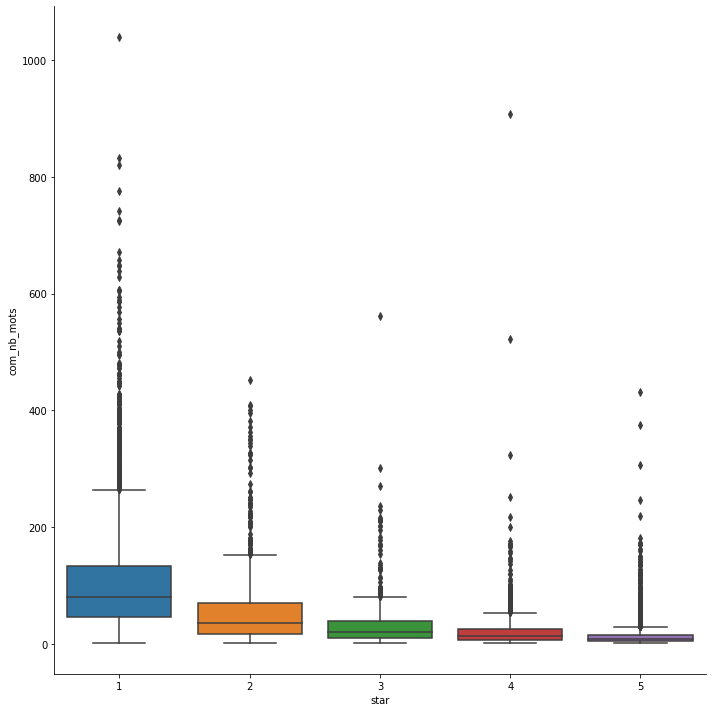

In [28]:
plt.figure(figsize= (15,10))
sns.catplot(x="star",y="com_nb_mots",data=df, kind="box", height=10, aspect=1, palette = "tab10")

Il semblerait que la taille du commentaire soit liée à la note laissée. De manière générale, plus la note laissée est bonne, plus le commentaire est court.

Vérifions notre intuition concernant ShowRoom sur TrustedShop:

<AxesSubplot:xlabel='source', ylabel='com_nb_mots'>

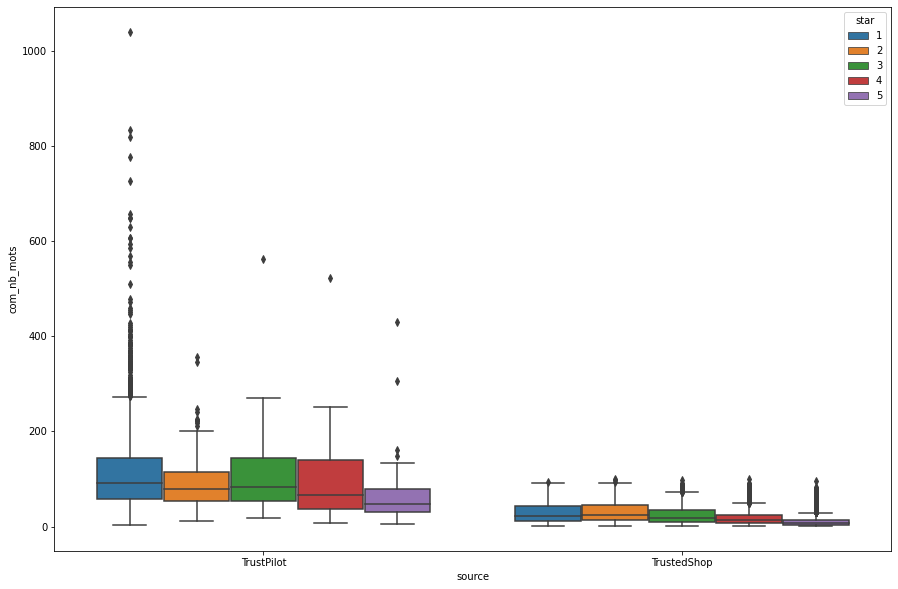

In [29]:
plt.figure(figsize= (15,10))
sns.boxplot(x="source", y="com_nb_mots", hue = 'star', data=df[df["company"]=="ShowRoom"])


On observe une nette différence de taille dans les commentaires entre TrustPilot et TrustedShop concernant l'entreprise ShowRoom. L'écart est particulièrement intéressant concernant les notes 4 & 5 qui, pour rappel, représentent 75% des notes ShowRoom sur TrustedShop. 

On notera au passage qu'il semble y avoir une limite de taille aux commentaires pouvant être laissés sur TrustedShop au vue de la concentration des valeurs maximum autour de 100 mots. Cette limite peut expliquer l'écart observé pour les notes faibles, mais il n'explique pas l'écart de comportement observé pour les notes 4 & 5.

Regardons de plus près la répartition de la taille des commentaires sur TrustedShop pour l'entreprise ShowRoom

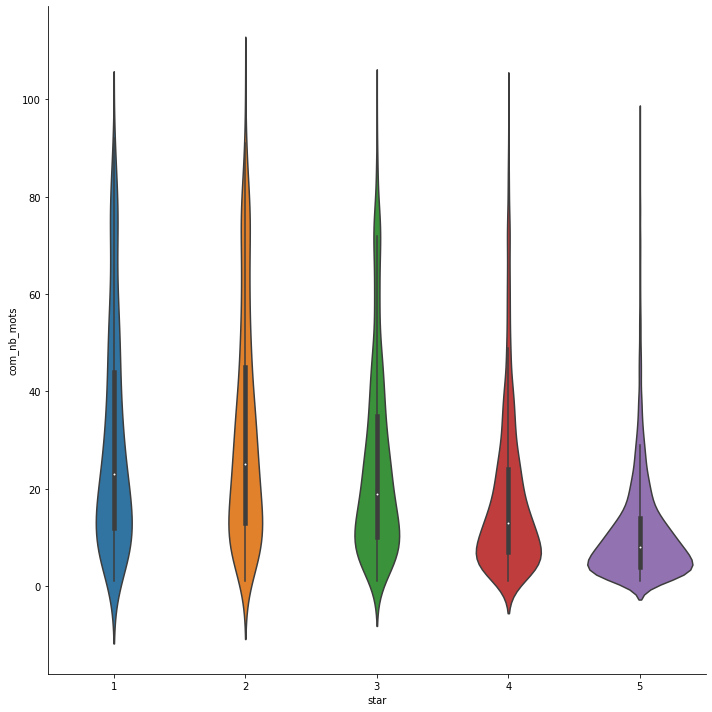

In [30]:
sns.catplot(x="star",y="com_nb_mots",data=df[(df["source"]=="TrustedShop") & (df["company"]=="ShowRoom")], kind="violin", height=10, aspect=1)

Plus de 75% des avis ShowRoom sur TrustedShop laissant 5 étoiles comportent moins de 20 mots. 50% même en comprennent moins de 10.

#### Procédons à présent à la racinisation d'une part des commentaires ayant été réduit et affichons les 20 mots les plus utilisés

In [31]:
from nltk.stem.snowball import  SnowballStemmer
porter_stemmer = SnowballStemmer(language='french')

def words_racine(my_comment):
    new_comment =""
    for word in my_comment.lower().split(" "):
        if word not in stop_words:
            new_comment +=porter_stemmer.stem(word)
            new_comment += " "
    return new_comment

df["Commentaires_reduit_racine"] = df.Commentaires_reduit.apply(lambda row : words_racine(row))

<AxesSubplot:>

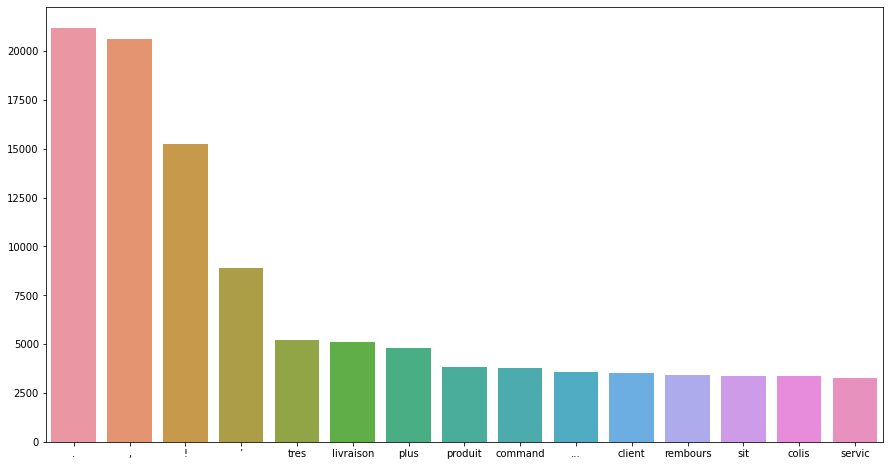

In [32]:
from collections import Counter
import seaborn as sns

chaine = ' '.join(i.lower() for i in df.Commentaires_reduit_racine)
dico = Counter(chaine.split())
mots = [m[0] for m in dico.most_common(15)]
freq = [m[1] for m in dico.most_common(15)]

plt.figure(figsize = (15,8))
sns.barplot(x=mots,y=freq)

Certains symboles de ponctuation ont été pris en compte comme mots. Procédons à leur nettoyage. Pour cela nous allons arbitrairement décider de ne pas prendre en compte les mots de moins de 4 lettres, afin de ne garder que les mots pouvant avoir une signification. On va cependant perdre des informations sur la négativité (ne / pas) d'un commentaire. 

In [33]:
from nltk.tokenize.regexp import RegexpTokenizer
tokenizer = RegexpTokenizer("[a-zA-Zé]{4,}")

def words_quatreplus(my_comment):
    new_comment =""
    for word in tokenizer.tokenize(my_comment.lower()):
        new_comment +=word
        new_comment +=" "
    return new_comment

df["Commentaires_reduit_4mots"] = df.Commentaires_reduit.apply(lambda row : words_quatreplus(row))

<AxesSubplot:>

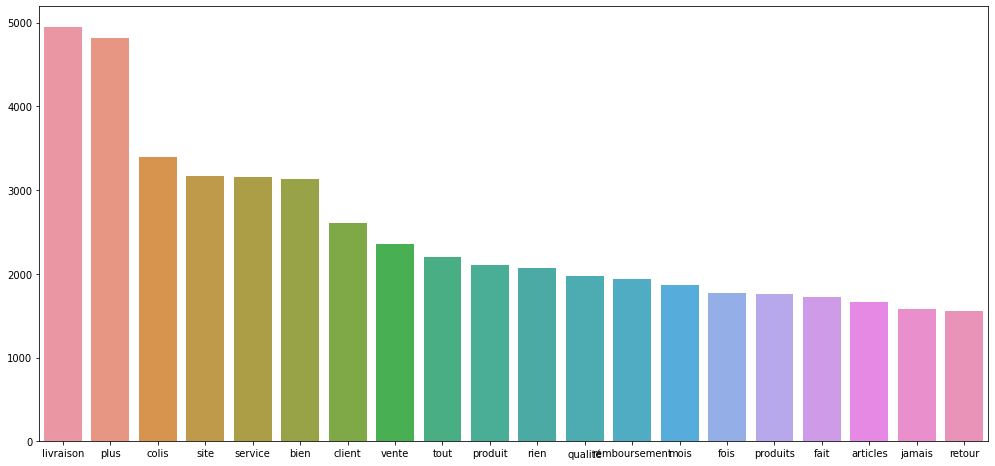

In [34]:
chaine = ' '.join(i.lower() for i in df.Commentaires_reduit_4mots)
dico = Counter(chaine.split())
mots = [m[0] for m in dico.most_common(20)]
freq = [m[1] for m in dico.most_common(20)]

plt.figure(figsize = (17,8))
sns.barplot(x=mots,y=freq)

On retrouve sans surprise les thèmes déjà évoqués plus haut:
- Le service client
- la livraison (et les délais)
- les retours & remboursements
    

Certain mots reviennent de très nombreuses fois, voyons combien de mots différent reviennent plus d'une centaine de fois parmis l'intégralité des commentaires :

In [35]:
freqmots = pd.DataFrame.from_dict(dico, orient="index", columns = ["iteration"])
freqmots = freqmots.sort_values("iteration", ascending = False)
freqmots2 = freqmots[freqmots["iteration"] >= 100]
freqmots2.shape

(540, 1)

En tout, 540 mots différents reviennent plus d'une centaine de fois parmi l'ensemble des commentaires. Une des pistes à suivre pour une modélisation future pourrait être l'usage de ces mots dans un algorithme d'apprentissage

### Synthèse

#### Exploration des données
Une première exploration des données nous à permis d'identifier les valeurs NaN ainsi que les lignes doublons Ce qui nous a permis d'effectuer un premier nettoyage. Nous avons par la suite identifier que les commentaires n'ont pas été tous rédigés dans la même langue, ce qui nous a permis de ne conserver que les commentaires français et les données qui y sont associées.

L'étape suivante a été de comparer les métadonnées (et notamment leur présence ou absence) avec les notes récoltées.
   - La comparaison stars / source puis stars /company nous a permis d'identifier un écart anormal en faveur de ShowRoom
   - La présence d'une réponse est liée à un commentaire négatif, mais n'est pas toujours liée à une mauvaise note
   - La présence de données clients tel que le nom ou la ville est optionnelle sur TrustedShop, facilitant ainsi la publication rapide d'avis

Nous avons ensuite fait une analyse des commentaires, en filtrant les mots vides ainsi que les mots de moins de 4 lettres. Cela a permis de faire ressortir les termes les plus fréquemment utilisés. Ils font généralement référence au service client, à la livraison, ou encore aux retours d'articles et remboursements.
Enfin nous avons fait un parallèle entre la taille des commentaires (en nombre de mots) et la note attribuée et on remarque qu' en général plus la note laissée est bonne, plus le commentaire est court. 

Une hypothèse qui a été formulée durant l'exploration de ces données est que l'entreprise ShowRoom aurait pratiqué du "review boosting" sur TrustedShop. il y a plusieurs faits pour motiver cette hypothèse:
    - Un boost soudain des notations à l'arrivé de TrustedShop à la mi 2020.
    - Un déséquilibre flagrant des notations entres TrustPilot et TrustedShop
    - La facilité pour poster un commentaire et une note sur TrustedShop
    - La différence dans la taille des commentaires pour les notes de 4 ou 5 étoiles entre TrustPilot et TrustedShop
Sans connaissance approfondie du contexte lié à ces données, il n'est pas possible de valider ou d'invalider cette hypothèse sur la seule base de ce dataset.

#### Les points importants à retenir en vue de la modélisation:
- Une relation existe entre la taille d'un commentaire et la note attribué
- Les verbatims présents dans un commentaire ne sont pas toujours représentatifs de la note (cf analyse sur les réponses)
- Les métadonnées peuvent participer à l'estimation de la note. (par exemple la Source : la majorité des notes négatives sont sur TrustPilot tandis que la majorité des notes positives sont sur TrustedShop)
- il est possible de réduire la taille du dictionnaire utilisé pour interpréter les commentaires
